## Libraries importieren

In [1]:
# zuerst installiere ich Requests, BeautifulSoup und Pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Agenda
- Beispielseite Scrapen
- Prototyping Vereinswerte
- Scrapen aller Vereinswerte
- Prototyping Vereinspunkte
- Scraping aller Vereinspunkte

## Beispielseite Scrapen

In [2]:
# die Seite transfermarkt.ch blockiert Anfragen, deshalb mit Barnabys Code die Blockade umgehen
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
url = 'https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2010'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

## Prototyping Teamwerte

In [3]:
# ich ziehe die Vereine raus, indem ich nach allen Elementen mit folgendem Pfad suche 
vereine = []
for verein in soup.find_all('td', {'class':'hauptlink no-border-links show-for-small show-for-pad'}):
    vereine.append(verein.text.encode('utf-8'))
vereine

['FC Basel',
 'BSC Young Boys',
 'FC Z\xc3\xbcrich',
 'FC Sion',
 'FC St. Gallen',
 'Grasshoppers',
 'FC Luzern',
 'Neuch\xc3\xa2tel Xamax',
 'AC Bellinzona',
 'FC Thun']

In [4]:
# ich ziehe die Marktwerte der Vereine raus, indem ich nach allen Elementen mit folgendem Pfad suche
# die ersten beiden Werte kann ich nicht brauchen, weil es Gesamtwerte der Liga sind > erst ab 3. Element [2:]
# ich brauche nur die Gesamtmarktwerte > jedes zweite Element überspringen [::2]
# ich will Kommazahlen (float), keine strings > ich ersetze 'Mio €' durch nichts und das Komma durch einen Punkt
marktwerte =[]
for marktwert in soup.find_all('td', {'class':'rechts show-for-small show-for-pad nowrap'})[2:][::2]:
    marktwerte.append(float(marktwert.text.encode('utf-8').replace(' Mio. €', '').replace(',', '.')))
marktwerte

[41.2, 26.6, 23.25, 18.38, 16.45, 14.2, 14.05, 12.35, 8.35, 7.95]

In [5]:
# jetzt bringe ich Vereine und Marktwerte zusammen
teamwertliste = []
for team, wert in zip(vereine, marktwerte):
    dictionary = {'Team': team,
                 'Wert': wert}    
    teamwertliste.append(dictionary)
# ich erstelle mit Pandas ein Dataframe
pd.DataFrame(teamwertliste)

,Team,Wert
0,FC Basel,41.20
1,BSC Young Boys,26.60
2,FC Zürich,23.25
3,FC Sion,18.38
4,FC St. Gallen,16.45
5,Grasshoppers,14.20
6,FC Luzern,14.05
7,Neuchâtel Xamax,12.35
8,AC Bellinzona,8.35
9,FC Thun,7.95


## Teamwerte der Letzten 8 Jahre scrapen

In [6]:
# Diese Tabelle will ich nicht nur für die Saison 2017, sondern für mehrere Jahre > ich setze einen range fest
# und passe die URL an, die ohne Jahresangabe bei allen gleich ist > id=...
# jetzt führe ich alles zusammen (und nehme beim dictionary noch das Jahr rein):

allejahre = []
jahre = list(range(2010,2018))
url = "https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id="

for jahr in jahre:
    url2 = (url+str(jahr))
    print("Working on url %s" % url2)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r = requests.get(url2, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    vereine = soup.find_all('td', {'class':'hauptlink no-border-links show-for-small show-for-pad'})
    marktwerte = soup.find_all('td', {'class':'rechts show-for-small show-for-pad nowrap'})
           
    for team, wert in zip(vereine, marktwerte[2:][::2]):
        team = team.text.encode('utf-8')
        wert = float(wert.text.encode('utf-8').replace(' Mio. €', '').replace(',', '.'))
        dictionary = {'Team': team,'Wert': wert,'Jahr': jahr}
    
        allejahre.append(dictionary)
# und erstelle mit Pandas eine neue Version des Dataframes mit allen Jahren
df_werte = pd.DataFrame(allejahre)
df_werte.head()

Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2010
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2011
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2012
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2013
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2014
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2015
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2016
Working on url https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2017


,Jahr,Team,Wert
0,2010,FC Basel,41.20
1,2010,BSC Young Boys,26.60
2,2010,FC Zürich,23.25
3,2010,FC Sion,18.38
4,2010,FC St. Gallen,16.45


## Punkte Prototyping

In [7]:
### Jetzt das gleich noch für die Tabelle mit den Punkten

vereine_punkte = []
for verein in soup.find_all('td', {'class':'no-border-links hauptlink'}):
    vereine_punkte.append(verein.text)
vereine_punkte

[u'\nBSC Young Boys ',
 u'\nFC Basel  ',
 u'\nFC Luzern ',
 u'\nFC Z\xfcrich \xa0 ',
 u'\nFC St. Gallen ',
 u'\nFC Sion ',
 u'\nFC Thun ',
 u'\nFC Lugano ',
 u'\nGrasshoppers ',
 u'\nLausanne-Sport ']

In [8]:
# Punkte herausfinden
alle_tabellen = soup.find_all('div', {'class':'responsive-table'})
tabelle2 = alle_tabellen[1]
reihen = tabelle2.find_all('tr')

for reihe in reihen[1:]:
    alle_tds = reihe.find_all('td')
    punkte = alle_tds[-1]
    print(punkte.text)

84
69
54
49
45
42
42
42
39
35


In [9]:
teampunkteliste = []
for team2, punkte in zip(vereine_punkte, reihen[1:]):
    team2 = team2.replace("\n","")
    punkte = punkte.find_all('td')[-1].text.encode('utf-8')
    dictionary = {'Team': team2,'Punkte': punkte}
    
    teampunkteliste.append(dictionary)

df_teampunkteliste = pd.DataFrame(teampunkteliste)
df_teampunkteliste

,Punkte,Team
0,84,BSC Young Boys
1,69,FC Basel
2,54,FC Luzern
3,49,FC Zürich
4,45,FC St. Gallen
5,42,FC Sion
6,42,FC Thun
7,42,FC Lugano
8,39,Grasshoppers
9,35,Lausanne-Sport


## Teampunkte der Letzten 8 Jahre scrapen

In [10]:
allejahre2 = []
jahre2 = list(range(2010,2018))
url = "https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id="

for jahr in jahre2:
    url2 = (url+str(jahr))
    print("Working on %s" % url2)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r = requests.get(url2, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    vereine2 = soup.find_all('td', {'class':'no-border-links hauptlink'})
    reihen = soup.find_all('div', {'class':'responsive-table'})[1].find_all("tr")

    for team2, punkte in zip(vereine2, reihen[1:]):
        team2 = team2.text.replace("\n","")
        punkte = punkte.find_all('td')[-1].text
        dictionary2 = {'Team': team2,'Punkte': punkte,'Jahr': jahr}
    
        allejahre2.append(dictionary2)
df_punkte = pd.DataFrame(allejahre2)
df_punkte.head()

Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2010
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2011
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2012
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2013
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2014
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2015
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2016
Working on https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2017


,Jahr,Punkte,Team
0,2010,\n2,Super League Barrage-Spiele (bis 11/12)
1,2011,\n2,Super League Barrage-Spiele (bis 11/12)
2,2012,72,FC Basel
3,2012,69,Grasshoppers
4,2012,59,FC St. Gallen


# Vereinsnamen harmosisieren

In [11]:
# in einer der beiden Tabellen Vereinsnamen harmonisieren, damit die beiden nachher zusammengeführt werden können
# ich mache es bei der erste Tabelle (mit Marktwerten)

def harm(elem):
    if elem == 'FC Basel 1893':
        return 'FC Basel'
    if elem == 'Grasshopper Club Zürich':
        return 'Grasshoppers'
    if elem == 'FC St. Gallen 1879':
        return 'FC St. Gallen'
    else:
        return elem


In [12]:
df_punkte["Team_renamed"] = df_punkte['Team'].apply(harm)
df_punkte.head()

/Users/plotti/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


,Jahr,Punkte,Team,Team_renamed
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)
2,2012,72,FC Basel,FC Basel
3,2012,69,Grasshoppers,Grasshoppers
4,2012,59,FC St. Gallen,FC St. Gallen


In [13]:
df_werte["Team_renamed"] = df_werte['Team'].apply(harm)
df_werte.head()

,Jahr,Team,Wert,Team_renamed
0,2010,FC Basel,41.20,FC Basel
1,2010,BSC Young Boys,26.60,BSC Young Boys
2,2010,FC Zürich,23.25,FC Zürich
3,2010,FC Sion,18.38,FC Sion
4,2010,FC St. Gallen,16.45,FC St. Gallen


# Beide Tabellen mergen

In [14]:
df_werte["team_jahr"] = df_werte["Team"]+df_werte["Jahr"].map(str)
df_punkte["team_jahr"] = df_punkte["Team"]+df_punkte["Jahr"].map(str)

In [15]:
df_werte.head()

,Jahr,Team,Wert,Team_renamed,team_jahr
0,2010,FC Basel,41.20,FC Basel,FC Basel2010
1,2010,BSC Young Boys,26.60,BSC Young Boys,BSC Young Boys2010
2,2010,FC Zürich,23.25,FC Zürich,FC Zürich2010
3,2010,FC Sion,18.38,FC Sion,FC Sion2010
4,2010,FC St. Gallen,16.45,FC St. Gallen,FC St. Gallen2010


In [16]:
df_punkte.head()

,Jahr,Punkte,Team,Team_renamed,team_jahr
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12) 2010
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12) 2011
2,2012,72,FC Basel,FC Basel,FC Basel 2012
3,2012,69,Grasshoppers,Grasshoppers,Grasshoppers 2012
4,2012,59,FC St. Gallen,FC St. Gallen,FC St. Gallen 2012


### Sieht so aus als ob wir noch bereinigen müssen, eines hat leerzeichen das andere nicht. 

In [17]:
df_punkte["Team"] = df_punkte["Team"].str.strip()
df_punkte["team_jahr"] = df_punkte["Team"]+df_punkte["Jahr"].map(str)
df_punkte.head()

,Jahr,Punkte,Team,Team_renamed,team_jahr
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)2010
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)2011
2,2012,72,FC Basel,FC Basel,FC Basel2012
3,2012,69,Grasshoppers,Grasshoppers,Grasshoppers2012
4,2012,59,FC St. Gallen,FC St. Gallen,FC St. Gallen2012


In [18]:
# in beiden Tabellen eine neue Kolonne erstellen, die Verein+Jahr beeinhaltet
# anhand von dieser Kolonne können wir die beiden Tabellen zusammengeführt (mergen)

df = df_werte.merge(df_punkte, on="team_jahr")
df.head()

/usr/local/lib/python2.7/site-packages/pandas/core/reshape/merge.py:1570: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


,Jahr_x,Team_x,Wert,Team_renamed_x,team_jahr,Jahr_y,Punkte,Team_y,Team_renamed_y
0,2012,FC Basel,39.25,FC Basel,FC Basel2012,2012,72,FC Basel,FC Basel
1,2012,BSC Young Boys,32.35,BSC Young Boys,BSC Young Boys2012,2012,43,BSC Young Boys,BSC Young Boys
2,2012,FC Sion,29.60,FC Sion,FC Sion2012,2012,48,FC Sion,FC Sion
3,2012,FC Luzern,18.20,FC Luzern,FC Luzern2012,2012,42,FC Luzern,FC Luzern
4,2012,Grasshoppers,14.15,Grasshoppers,Grasshoppers2012,2012,69,Grasshoppers,Grasshoppers


# Visualisieren

In [19]:
df_result = df[["Jahr_x","Team_x","Wert","Punkte"]]
df_result.columns = ["Jahr","Team","Wert","Punkte"]
df_result.head()

,Jahr,Team,Wert,Punkte
0,2012,FC Basel,39.25,72
1,2012,BSC Young Boys,32.35,43
2,2012,FC Sion,29.60,48
3,2012,FC Luzern,18.20,42
4,2012,Grasshoppers,14.15,69


In [26]:
df_result.dtypes

Jahr        int64
Team       object
Wert      float64
Punkte     object
dtype: object

## Types bereinigen

In [27]:
df_result['Punkte'] = df_result['Punkte'].astype(float)
df_result.dtypes

/Users/plotti/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Jahr        int64
Team       object
Wert      float64
Punkte    float64
dtype: object

In [28]:
df_result.head()

,Jahr,Team,Wert,Punkte
0,2012,FC Basel,39.25,72.0
1,2012,BSC Young Boys,32.35,43.0
2,2012,FC Sion,29.60,48.0
3,2012,FC Luzern,18.20,42.0
4,2012,Grasshoppers,14.15,69.0


## Scatterplot

In [1]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

data = [
    go.Scatter(
        x=list(df_result["Punkte"]),
        y=list(df_result["Wert"]),
        mode='markers',
        text=list(df_result["Team"])
    )
]
layout = go.Layout(
    title='Wert in Mio. vs Punkte'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='hover-chart-basic')

ModuleNotFoundError: No module named 'plotly'

### Mit Regression

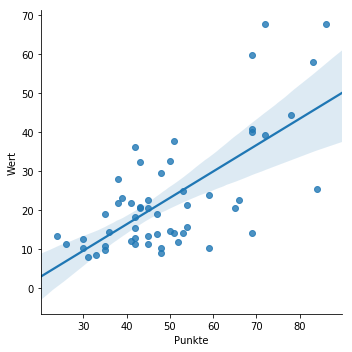

In [30]:
import seaborn as sns
sns.lmplot(x="Punkte", y="Wert", data=df_result);

## Mit regressionsgerade pro club

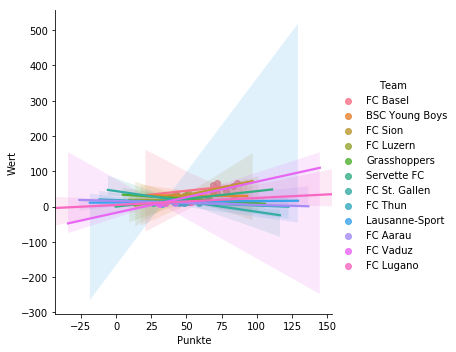

In [31]:
sns.lmplot(x="Punkte", y="Wert", hue="Team", data=df_result);

- sind etwas viele :) 
- nehmen wir einfach 2

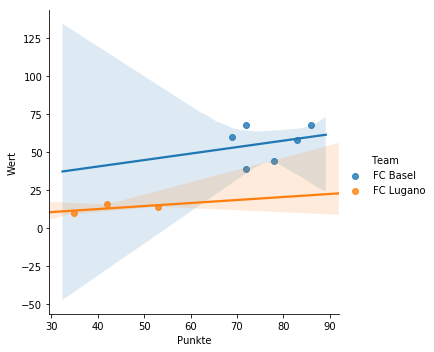

In [33]:
tmp = df_result[df_result["Team"].isin(["FC Basel", "FC Lugano"])]
sns.lmplot(x="Punkte", y="Wert", hue="Team", data=tmp);

# Oder alle nebeneinander

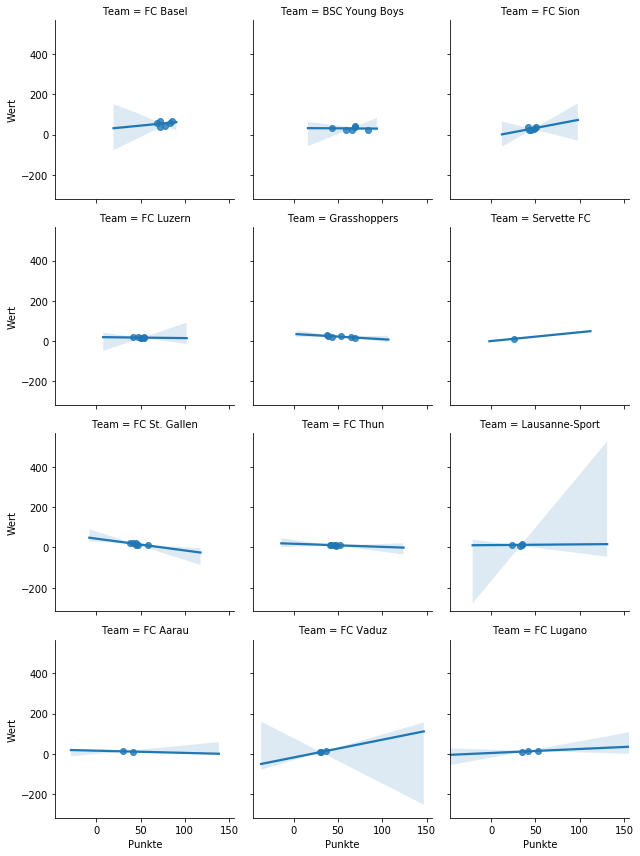

In [34]:
sns.lmplot(x="Punkte", y="Wert", col="Team", data=df_result, col_wrap=3, height=3);

# Viel Spaß Yannick!